
# Histograms 直方圖

直方圖是一個影像像素的統計表，橫軸為影像中所有可能的像素值，假使為8位元圖，範圍即為0到255，縱軸為此橫軸強度的像素個數，直方圖可以被歸一化(Normalized)，歸一化後所有項和為一，在這種情況下，縱軸值表示此強度的像素佔影像的比例。

直方圖是影像的一個重要特性，我們可以從這看出強度分布狀況，像是否太暗或過曝，或者分布太過集中，進而評估影像的品質。在影像檢索時，直方圖可以當成是一段獨特的紋理，或者是獨特的物體，透過直方圖的比較協助我們搜尋物體。

In [3]:
import numpy as np
import imutils
import cv2

# 資料視覺化模組
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 不要顯示惱人的 warning 訊息
import warnings
warnings.filterwarnings('ignore')

# 在 Notebook 裡可即時繪圖
%matplotlib inline  

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size':13})

## 灰階直方圖

使用cv2.calcHist可產生指定圖片的直方圖資訊。

cv2.calcHist(images, channels, mask, histSize, ranges)

+ imaages：要分析的圖片檔
+ channels：產生的直方圖類型。例：[0]→灰階，[0, 1, 2]→RGB三色。
+ mask：optional，若有提供則僅計算mask的部份。
+ histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
+ ranges：X軸(像素強度)的範圍，預設為[0,256]（非筆誤，calcHist函式的要求，最後那個值是表示<256）。

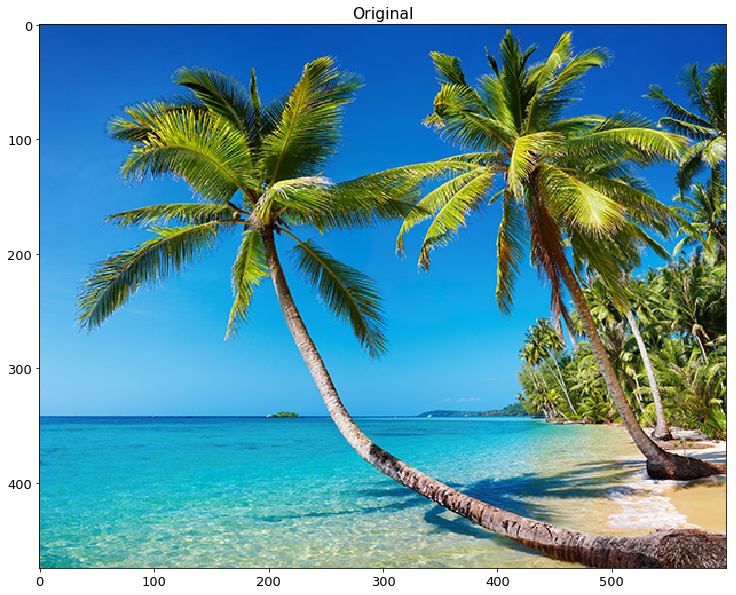

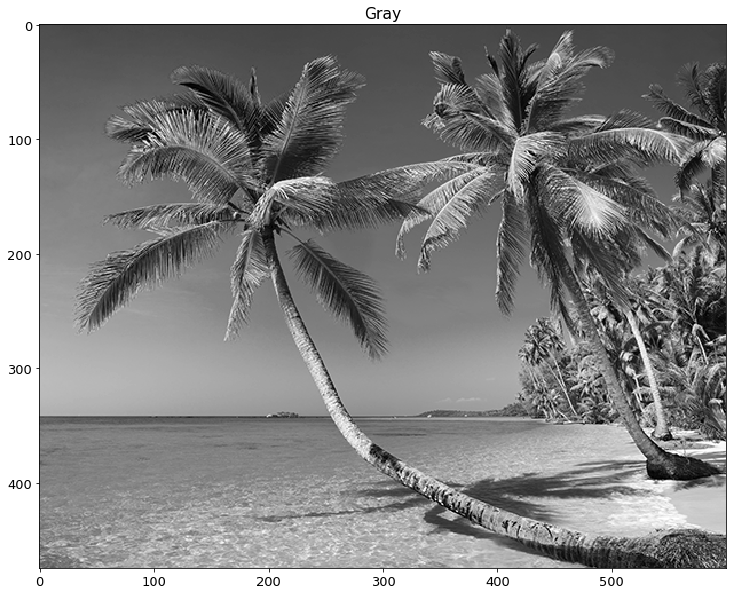

In [4]:
# load the image, convert it to grayscale, and show it
image = cv2.imread("../input/beach.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Gray")
plt.imshow(gray, cmap="gray")
plt.show()

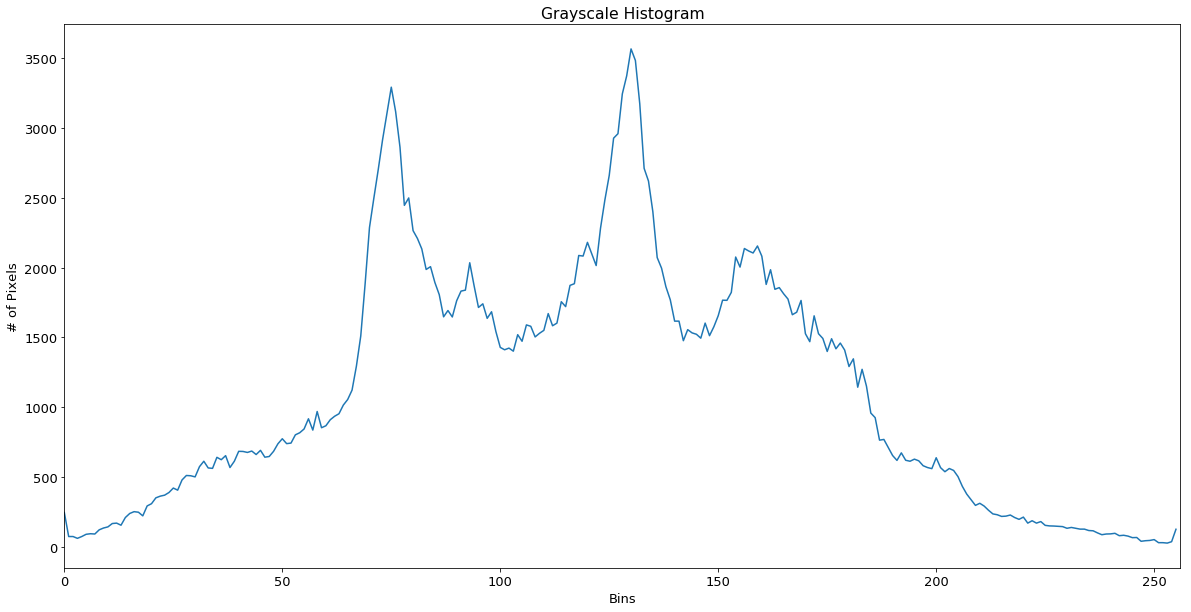

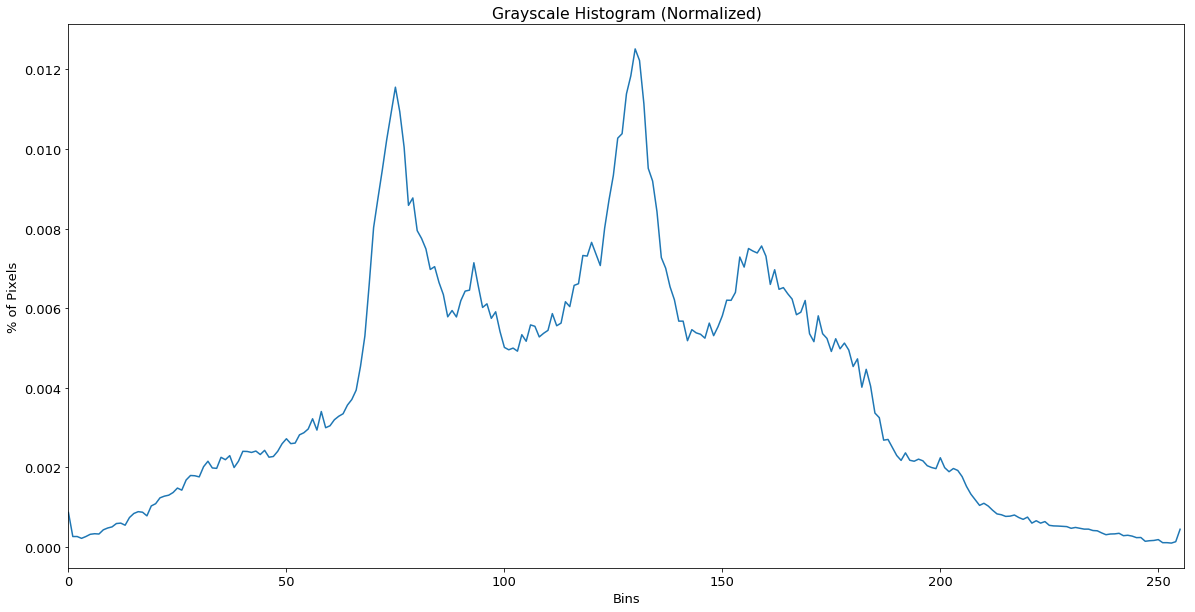

In [5]:
# construct a grayscale histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# normalize the histogram
hist /= hist.sum()

# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

## Quiz

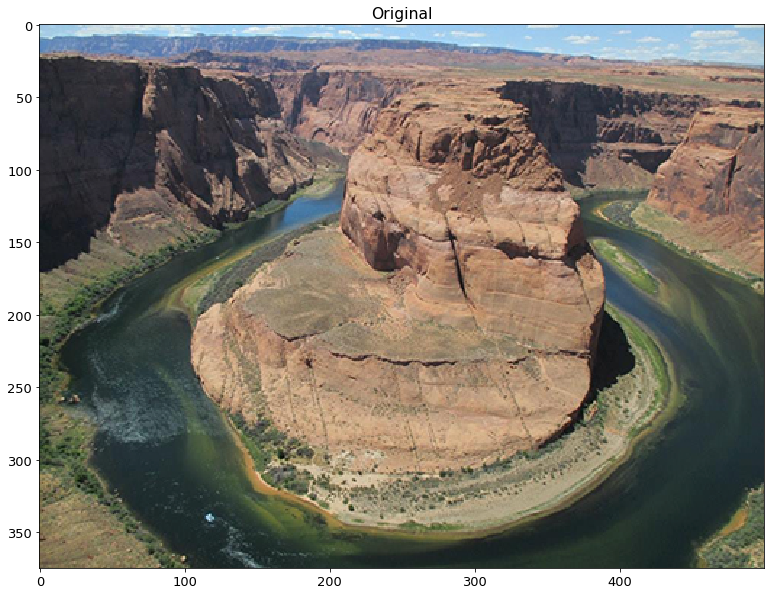

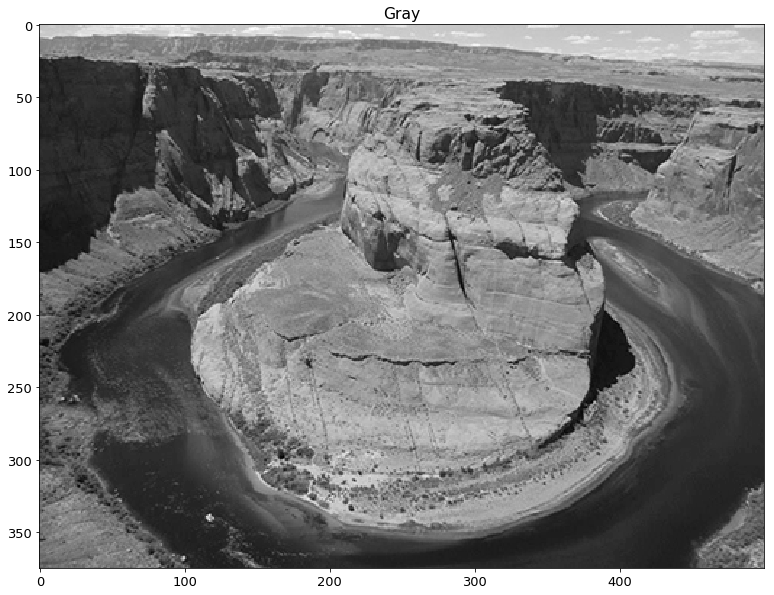

In [6]:
# load the image, convert it to grayscale, and show it
image = cv2.imread("../input/horseshoe_bend.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.title("Gray")
plt.imshow(gray, cmap="gray")
plt.show()

(0, 256)

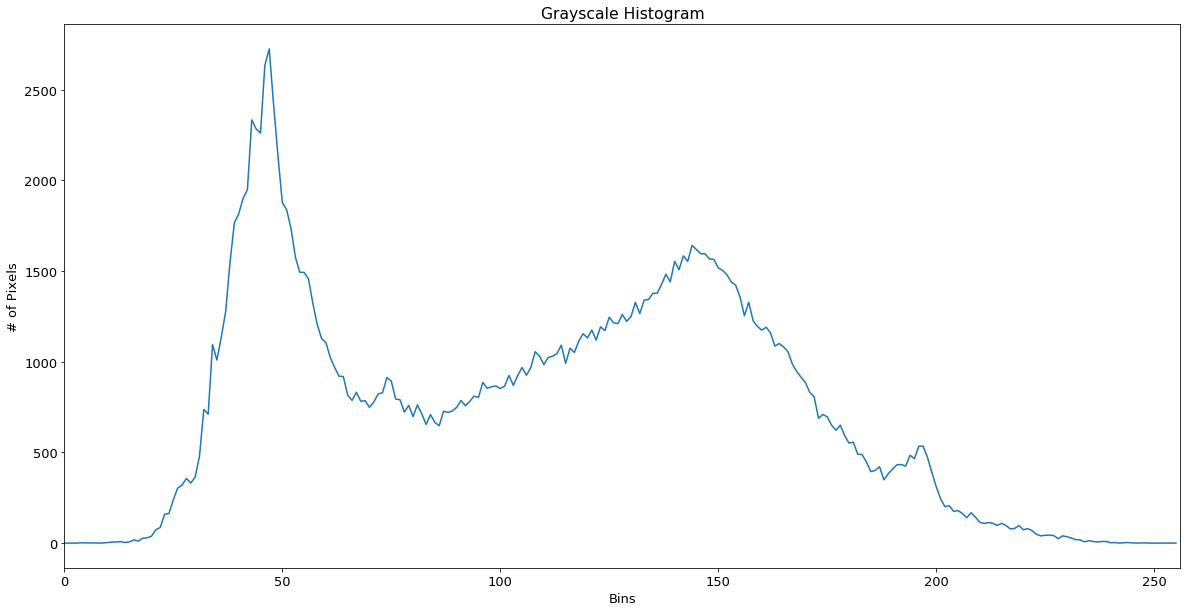

In [7]:
# construct a grayscale histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

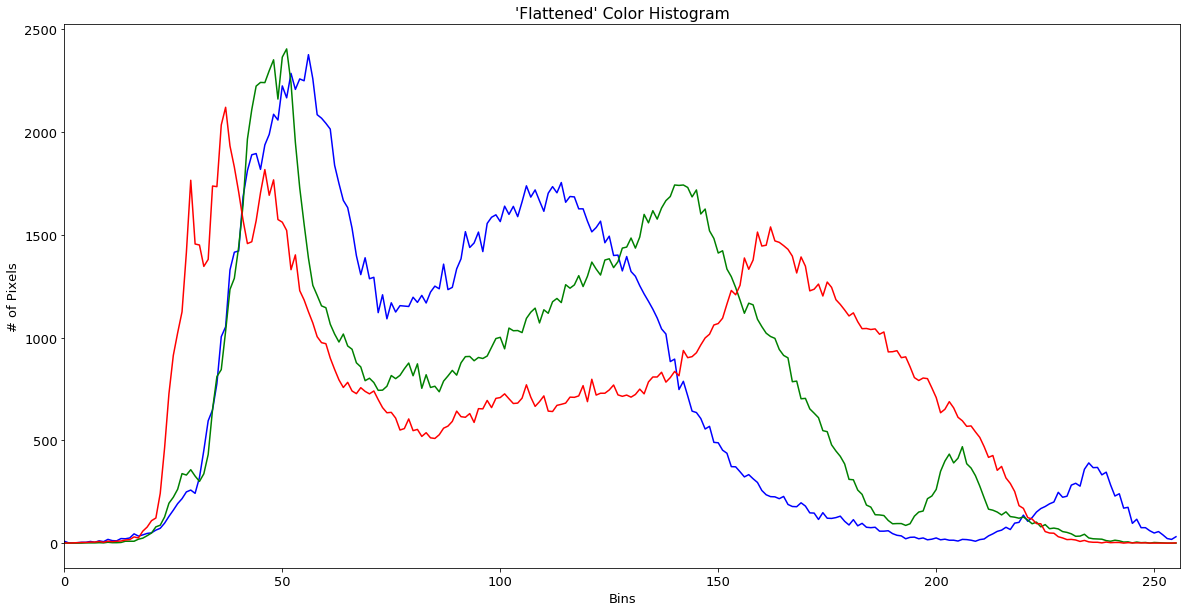

In [8]:
# grab the image channels, initialize the tuple of colors and the
# figure
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

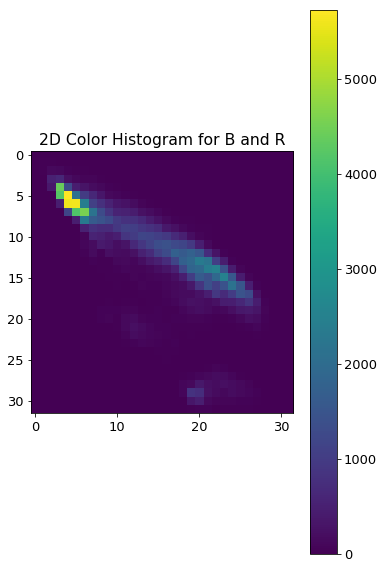

In [10]:
# let's move on to 2D histograms -- we need to reduce the
# number of bins in the histogram from 256 to 32 so we can
# better visualize the results
fig = plt.figure()

# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

In [13]:
# apply histogram equalization to stretch the constrast of our image
eq = cv2.equalizeHist(gray)

bin=eq[272, 146]
print("Pixel at (146, 272) - bin = {}".format(bin))

Pixel at (146, 272) - bin = 210
